In [2]:
# Import yfinance library
import yfinance as yf
import pandas as pd
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.4f' % x)

## K-means with Stock data

In [98]:
# Group by Ticker and calculate average return and standard deviation
ticker_stats = total_returns.groupby('Ticker')['F_1_d_returns'].agg(['mean', 'std'])
ticker_stats.head()

,mean,std
Ticker,,
A,0.0005,0.0259
AAL,0.0008,0.0415
AAPL,0.0012,0.0246
ABBV,0.0008,0.0166
ABNB,0.0006,0.0324


In [136]:
# Standardize the data
scaler = StandardScaler()
ticker_stats_scaled = scaler.fit_transform(ticker_stats[['mean', 'std']])

In [141]:
ssd = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(ticker_stats_scaled)
    sse.append(kmeans.inertia_)  # Inertia is the sum of squared distances to the closest cluster center


C:\Users\cramk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cramk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cramk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cramk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cramk\anaconda3\Lib\site-packages\sklearn\clust

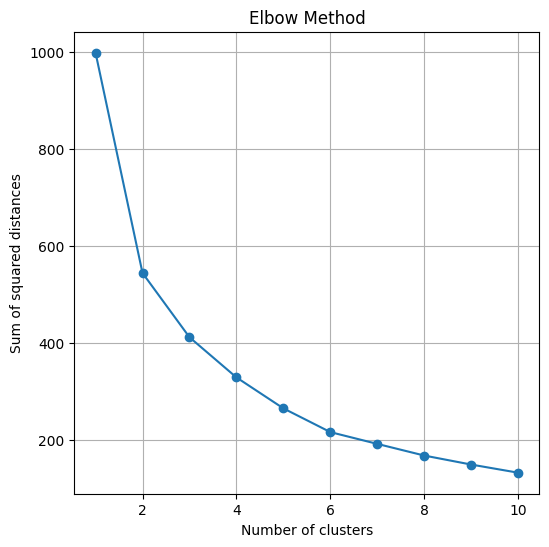

In [142]:
plt.figure(figsize=(6, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.grid(True)
plt.show()


In [143]:
# Function to find the elbow point
def find_elbow_point(sse, k_range):
    # Normalize the SSE to a 0-1 scale
    sse = np.array(sse)
    sse_normalized = (sse - sse.min()) / (sse.max() - sse.min())

    # Normalize the k values to a 0-1 scale
    k = np.array(k_range)
    k_normalized = (k - k.min()) / (k.max() - k.min())

    # Compute the distances from the line connecting the first and last points
    distances = []
    for i in range(len(k_normalized)):
        p1 = np.array([k_normalized[0], sse_normalized[0]])
        p2 = np.array([k_normalized[-1], sse_normalized[-1]])
        p = np.array([k_normalized[i], sse_normalized[i]])
        dist = np.abs(np.cross(p2-p1, p1-p)) / np.linalg.norm(p2-p1)
        distances.append(dist)

    # Find the index of the maximum curvature
    elbow_idx = np.argmax(distances)
    return k_range[elbow_idx], distances, k_normalized, sse_normalized

# Determine the optimal number of clusters using the elbow method
optimal_k, distances, k_normalized, sse_normalized = find_elbow_point(sse, k_range)
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 3


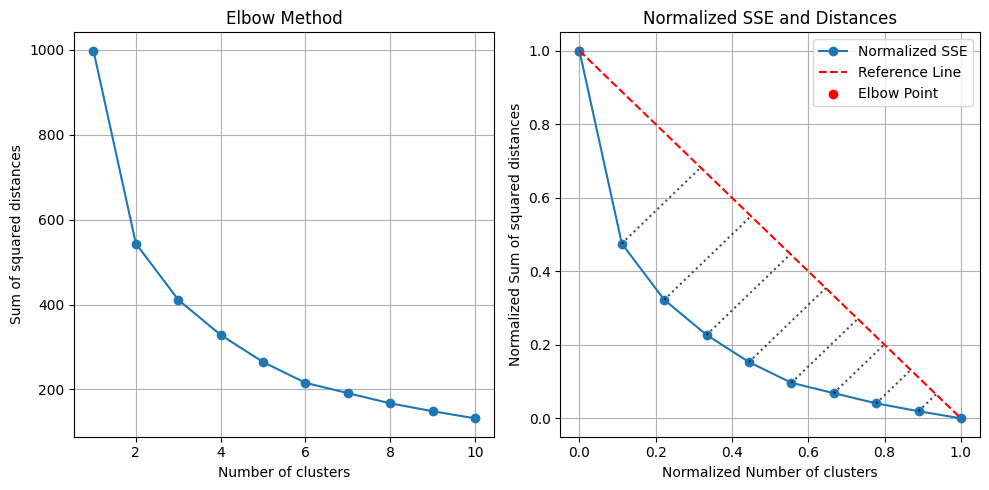

In [144]:

plt.figure(figsize=(10, 5))

# Plotting the first subplot (Elbow Method)
plt.subplot(1, 2, 1)
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.grid(True)

# Plotting the second subplot (Normalized SSE and Distances)
plt.subplot(1, 2, 2)
plt.plot(k_normalized, sse_normalized, marker='o', label='Normalized SSE')
plt.plot([0, 1], [sse_normalized[0], sse_normalized[-1]], 'r--', label='Reference Line')

# Calculating and plotting lines to extend to the reference line
for i in range(len(k_normalized)):
    p1 = np.array([0, sse_normalized[0]])  # Start of the reference line
    p2 = np.array([1, sse_normalized[-1]])  # End of the reference line
    p = np.array([k_normalized[i], sse_normalized[i]])
    
    # Vector between p1 and p2
    vec_p1p2 = p2 - p1
    
    # Vector between p1 and p
    vec_p1p = p - p1
    
    # Project vec_p1p onto vec_p1p2
    scalar_proj = np.dot(vec_p1p, vec_p1p2) / np.dot(vec_p1p2, vec_p1p2)
    projected_point = p1 + scalar_proj * vec_p1p2
    
    plt.plot([k_normalized[i], projected_point[0]], [sse_normalized[i], projected_point[1]], 'k:', alpha=0.7)

# Highlighting the elbow point
elbow_index = np.argmax(sse_normalized)
plt.scatter(k_normalized[elbow_index], sse_normalized[elbow_index], color='red', label='Elbow Point')

plt.title('Normalized SSE and Distances')
plt.xlabel('Normalized Number of clusters')
plt.ylabel('Normalized Sum of squared distances')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [145]:
from sklearn.cluster import KMeans

# Number of clusters (you can adjust this)
k = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(ticker_stats_scaled)

# Add cluster labels to the original DataFrame
ticker_stats['Cluster'] = clusters

# Count the number of stocks in each cluster
cluster_counts = pd.Series(clusters).value_counts().sort_index()

# Inverse transform scaled mean and std to get the original data
cluster_centers_original = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers_original, columns=['mean', 'std'])
cluster_centers_df['Stocks Count'] = cluster_counts.values

# Print the clusters
print("Cluster Centers with Stock Count:")
print(cluster_centers_df)

C:\Users\cramk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers with Stock Count:
    mean    std  Stocks Count
0 0.0008 0.0247           205
1 0.0012 0.0333            70
2 0.0005 0.0178           224


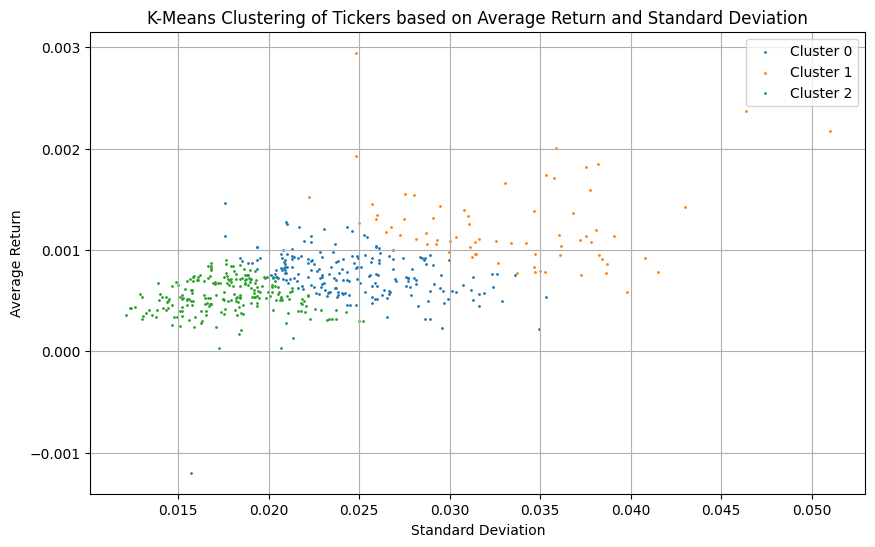

In [146]:
# Visualize the clusters
# (You may need to adjust this based on your visualization preferences)
plt.figure(figsize=(10, 6))
for cluster in range(k):
    plt.scatter(ticker_stats[ticker_stats['Cluster'] == cluster]['std'],
                ticker_stats[ticker_stats['Cluster'] == cluster]['mean'],
                label=f'Cluster {cluster}', s=1)
plt.title('K-Means Clustering of Tickers based on Average Return and Standard Deviation')
plt.xlabel('Standard Deviation')
plt.ylabel('Average Return')
plt.legend()
plt.grid(True)
plt.show()

# DEMO 1

In [1]:
# Generate sample data
np.random.seed(42)
data1 = np.random.normal(loc=[2, 2], scale=0.5, size=(50, 2))
data2 = np.random.normal(loc=[8, 8], scale=0.5, size=(50, 2))
data3 = np.random.normal(loc=[2, 8], scale=0.5, size=(50, 2))

In [2]:

# Create pandas DataFrame
df1 = pd.DataFrame(data1, columns=['Feature 1', 'Feature 2'])
df2 = pd.DataFrame(data2, columns=['Feature 1', 'Feature 2'])
df3 = pd.DataFrame(data3, columns=['Feature 1', 'Feature 2'])

# Concatenate the DataFrames
df = pd.concat([df1, df2, df3], ignore_index=True)

df.head()

,Feature 1,Feature 2
0,2.248357,1.930868
1,2.323844,2.761515
2,1.882923,1.882932
3,2.789606,2.383717
4,1.765263,2.271280


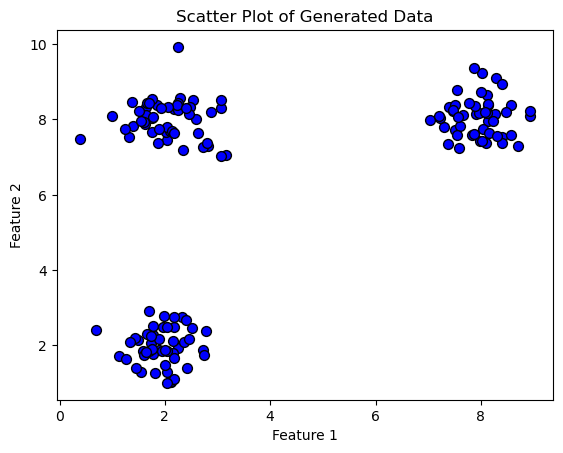

In [3]:
# Scatter plot of the data before K-means clustering
plt.scatter(df['Feature 1'], df['Feature 2'], c='blue', marker='o', edgecolor='k', s=50)
plt.title('Scatter Plot of Generated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [4]:
X = df.values

In [6]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

NameError: name 'StandardScaler' is not defined

In [114]:
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)  # Inertia is the sum of squared distances to the closest cluster center


C:\Users\cramk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cramk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cramk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\cramk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [7]:
plt.figure(figsize=(6, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.grid(True)
plt.show()


NameError: name 'k_range' is not defined

<Figure size 600x600 with 0 Axes>

In [8]:
# Function to find the elbow point
def find_elbow_point(sse, k_range):
    # Normalize the SSE to a 0-1 scale
    sse = np.array(sse)
    sse_normalized = (sse - sse.min()) / (sse.max() - sse.min())

    # Normalize the k values to a 0-1 scale
    k = np.array(k_range)
    k_normalized = (k - k.min()) / (k.max() - k.min())

    # Compute the distances from the line connecting the first and last points
    distances = []
    for i in range(len(k_normalized)):
        p1 = np.array([k_normalized[0], sse_normalized[0]])
        p2 = np.array([k_normalized[-1], sse_normalized[-1]])
        p = np.array([k_normalized[i], sse_normalized[i]])
        dist = np.abs(np.cross(p2-p1, p1-p)) / np.linalg.norm(p2-p1)
        distances.append(dist)

    # Find the index of the maximum curvature
    elbow_idx = np.argmax(distances)
    return k_range[elbow_idx], distances, k_normalized, sse_normalized

# Determine the optimal number of clusters using the elbow method
optimal_k, distances, k_normalized, sse_normalized = find_elbow_point(sse, k_range)
print(f"Optimal number of clusters: {optimal_k}")

NameError: name 'sse' is not defined

In [ ]:

plt.figure(figsize=(10, 5))

# Plotting the first subplot (Elbow Method)
plt.subplot(1, 2, 1)
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors')
plt.grid(True)

# Plotting the second subplot (Normalized SSE and Distances)
plt.subplot(1, 2, 2)
plt.plot(k_normalized, sse_normalized, marker='o', label='Normalized SSE')
plt.plot([0, 1], [sse_normalized[0], sse_normalized[-1]], 'r--', label='Reference Line')

# Calculating and plotting lines to extend to the reference line
for i in range(len(k_normalized)):
    p1 = np.array([0, sse_normalized[0]])  # Start of the reference line
    p2 = np.array([1, sse_normalized[-1]])  # End of the reference line
    p = np.array([k_normalized[i], sse_normalized[i]])
    
    # Vector between p1 and p2
    vec_p1p2 = p2 - p1
    
    # Vector between p1 and p
    vec_p1p = p - p1
    
    # Project vec_p1p onto vec_p1p2
    scalar_proj = np.dot(vec_p1p, vec_p1p2) / np.dot(vec_p1p2, vec_p1p2)
    projected_point = p1 + scalar_proj * vec_p1p2
    
    plt.plot([k_normalized[i], projected_point[0]], [sse_normalized[i], projected_point[1]], 'k:', alpha=0.7)

# Highlighting the elbow point
elbow_index = np.argmax(sse_normalized)
plt.scatter(k_normalized[elbow_index], sse_normalized[elbow_index], color='red', label='Elbow Point')

plt.title('Normalized SSE and Errors')
plt.xlabel('Normalized Number of Clusters')
plt.ylabel('Normalized Sum of Squared Errors')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Optimal number of clusters: 3


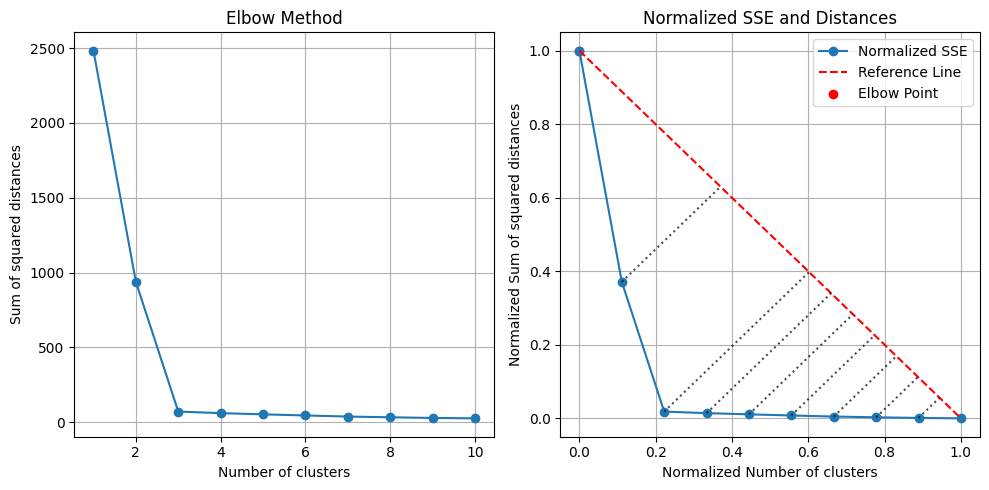

In [23]:


kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

C:\Users\cramk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


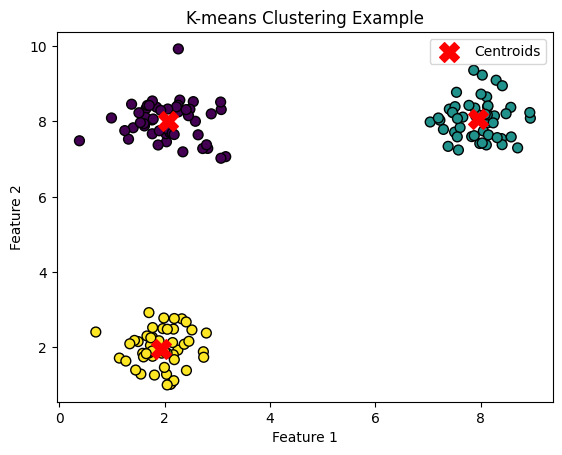

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering Example')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### DEMO 2 PCA with Artificial data

In [47]:
np.random.seed(0)
# Create synthetic data with two features
data = np.random.randn(100, 2)
data[:, 1] = 2 * data[:, 0] + np.random.randn(100)  # introducing correlation

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Feature 1', 'Feature 2'])

# Display the first few rows of the DataFrame
df.head()

,Feature 1,Feature 2
0,1.764052,3.158923
1,0.978738,1.718097
2,1.867558,4.834776
3,0.950088,2.555441
4,-0.103219,0.433694


In [53]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=['Feature 1', 'Feature 2'])

In [54]:
# Calculate correlation matrix
correlation_matrix = df_scaled.corr()

# Print the correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

Correlation matrix:
           Feature 1  Feature 2
Feature 1    1.00000    0.91601
Feature 2    0.91601    1.00000


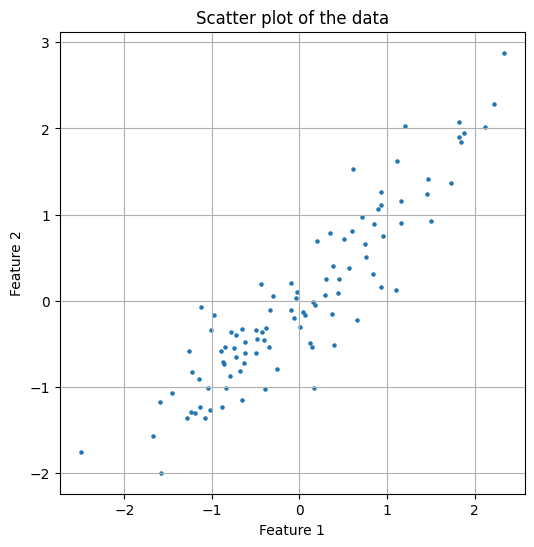

In [56]:
plt.figure(figsize=(6, 6))
plt.scatter(df_scaled['Feature 1'], df_scaled['Feature 2'], alpha=1, s=5)
plt.title('Scatter plot of the data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [77]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_scaled)

Loadings:
                PC1
Feature 1  0.707107
Feature 2  0.707107


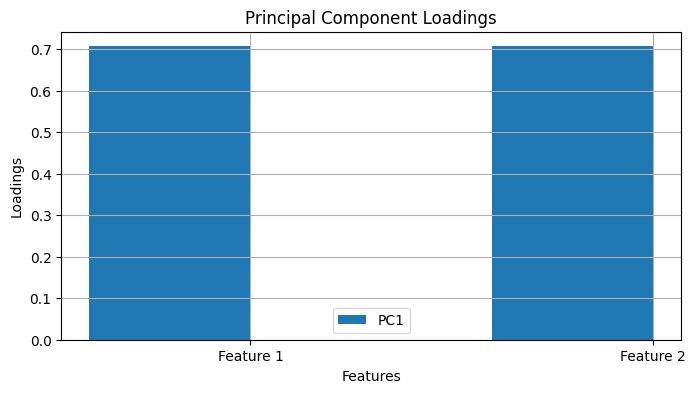

In [76]:
loadings = pca_adjusted.components_.T
loading_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=df.columns)

print("Loadings:")
print(loading_df)

plt.figure(figsize=(8, 4))
for i in range(loading_df.shape[1]):
    plt.bar(np.arange(1, len(loading_df) + 1) - 0.2 + i*0.4/loading_df.shape[1], loading_df.iloc[:, i], width=0.4/loading_df.shape[1], label=f'PC{i+1}')
plt.ylabel('Loadings')
plt.xlabel('Features')
plt.title('Principal Component Loadings')
plt.legend(loc='best')
plt.xticks(range(1, len(loading_df) + 1), loading_df.index)
plt.grid(True)
plt.show()

In [78]:
# Print explained variance ratio
print("Explained variance ratio:")
print(pca.explained_variance_ratio_)

Explained variance ratio:
[0.95800476 0.04199524]


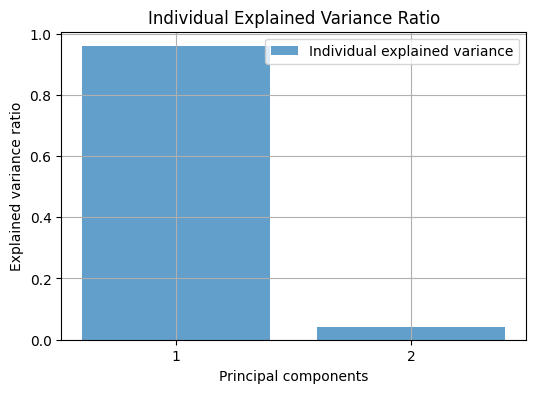

In [64]:
# Visualize individual explained variance
plt.figure(figsize=(6, 4))
plt.bar(range(1, 3), pca.explained_variance_ratio_, alpha=0.7, align='center', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Individual Explained Variance Ratio')
plt.legend(loc='best')
plt.grid(True)
plt.xticks([1, 2])  # Only show ticks at positions 1 and 2
plt.show()


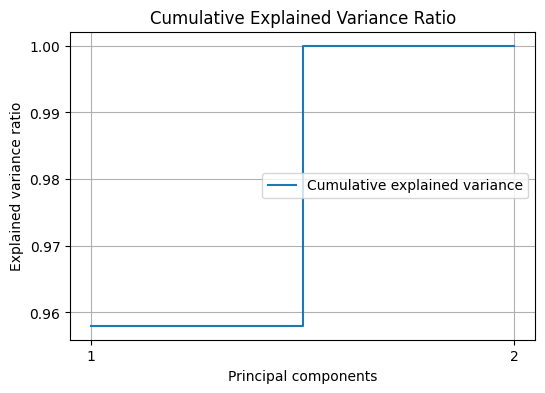

In [66]:
# Visualize cumulative explained variance
plt.figure(figsize=(6, 4))
plt.step(range(1, 3), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Cumulative Explained Variance Ratio')
plt.legend(loc='best')
plt.xticks([1, 2])
plt.grid(True)
plt.show()

In [67]:
# Determine number of components to capture 90% variance
pca_full = PCA().fit(df_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.9) + 1

print(f"Number of components to capture at least 90% variance: {num_components}")

# Rerun PCA with the determined number of components
pca_adjusted = PCA(n_components=num_components)
data_pca_adjusted = pca_adjusted.fit_transform(df_scaled)

# Print adjusted explained variance ratio
print("Adjusted explained variance ratio:")
print(pca_adjusted.explained_variance_ratio_)

Number of components to capture at least 90% variance: 1
Adjusted explained variance ratio:
[0.95800476]


In [60]:
# Transform data back to original space
data_pca_restored = pca.inverse_transform(data_pca)
data_pca_restored = scaler.inverse_transform(data_pca_restored)

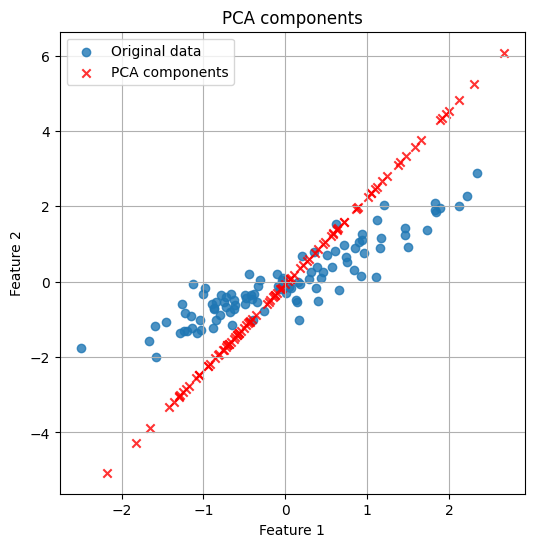

In [58]:
plt.figure(figsize=(6, 6))
plt.scatter(df['Feature 1'], df['Feature 2'], alpha=0.8, label='Original data')
plt.scatter(data_pca_restored[:, 0], data_pca_restored[:, 1], alpha=0.8, label='PCA components', marker='x', c='r')
plt.title('PCA components')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

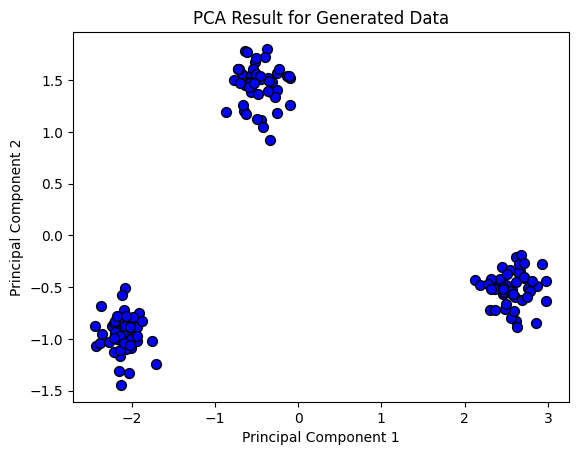

Explained variance by each principal component: [0.75857409 0.22477001]
Cumulative explained variance: [0.75857409 0.98334411]


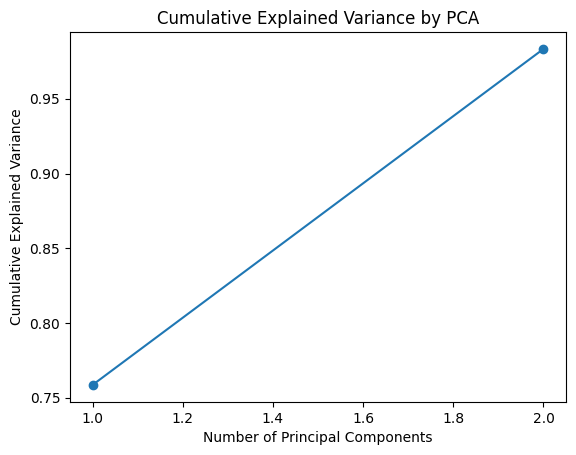

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_df = pca.fit_transform(scaled_df)

# Convert the PCA result to a DataFrame for plotting
pca_df = pd.DataFrame(pca_df, columns=['Principal Component 1', 'Principal Component 2'])

# Plot the PCA result
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c='blue', marker='o', edgecolor='k', s=50)
plt.title('PCA Result for Generated Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each principal component: {explained_variance}')

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)
print(f'Cumulative explained variance: {cumulative_explained_variance}')

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


# DEMO 3 

In [ ]:
# Group by Ticker and calculate average return and standard deviation
ticker_stats = total_returns.groupby('Ticker')['F_1_d_returns'].agg(['mean', 'std'])

In [ ]:

# Standardize the data
scaler = StandardScaler()
ticker_stats_scaled = scaler.fit_transform(ticker_stats[['mean', 'std']])

In [ ]:

# Initialize list to store inertias
sse = []
k_range = range(1, 11)

# Test different numbers of clusters
for k in k_range:    
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(ticker_stats_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [ ]:
# Determine the optimal number of clusters using the elbow method
func_lib.plot_optimal_cluster_point(sse, k_range)

In [ ]:
# Number of clusters 
k = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(ticker_stats_scaled)

# Add cluster labels to the original DataFrame
ticker_stats['Cluster'] = clusters
'''
# Count the number of stocks in each cluster
cluster_counts = pd.Series(clusters).value_counts().sort_index()

# Inverse transform scaled mean and std to get the original data
cluster_centers_original = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers_original, columns=['mean', 'std'])
cluster_centers_df['Stocks Count'] = cluster_counts.values

# Print the clusters
print("Cluster Centers with Stock Count:")
print(cluster_centers_df)
'''

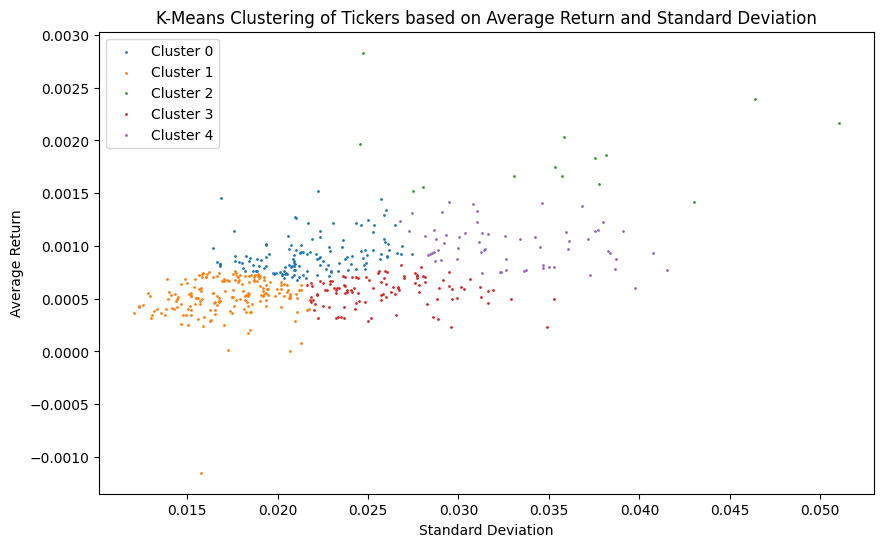

In [28]:
# Visualize the clusters
# (You may need to adjust this based on your visualization preferences)
plt.figure(figsize=(10, 6))
for cluster in range(k):
    plt.scatter(ticker_stats[ticker_stats_scaled['Cluster'] == cluster]['std'],
                ticker_stats[ticker_stats_scaled['Cluster'] == cluster]['mean'],
                label=f'Cluster {cluster}', s=1)
plt.title('K-Means Clustering of Tickers based on Average Return and Standard Deviation')
plt.xlabel('Standard Deviation')
plt.ylabel('Average Return')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
'''
# Examine stocks within each cluster
clustered_stocks = total_returns.groupby('Cluster')['F_1_d_returns'].unique()

# Evaluate the quality of clusters (e.g., silhouette score)
from sklearn.metrics import silhouette_score

silhouette_score = silhouette_score(X_scaled, cluster_labels)
print(f'Silhouette Score: {silhouette_score}')
'''

### DEMO 4 PCA using stock market data

In [5]:
# Create a list of momentums for 1d and 2d returns
list_of_momentums = [1, 2, 3, 29, 30, 31, 59, 60, 61]
# Run the function computingReturns and save the output as total_data
total_returns = computingReturns(historical_prices, list_of_momentums)
#Print the first 5 rows of total_data
total_returns.drop(columns={'F_1_d_returns'}, inplace=True)
total_returns.head()

1_d_returns  2_d_returns  3_d_returns  29_d_returns  \
Ticker Date                                                              
A      2000-03-30      -0.0625      -0.1186      -0.0810        0.0825   
       2000-03-31      -0.0095      -0.0714      -0.1270        0.1093   
       2000-04-03      -0.0577      -0.0667      -0.1250        0.0710   
       2000-04-04      -0.0459      -0.1010      -0.1095       -0.0556   
       2000-04-05       0.0368      -0.0108      -0.0679       -0.0919   

                   30_d_returns  31_d_returns  59_d_returns  60_d_returns  \
Ticker Date                                                                 
A      2000-03-30        0.2963        0.2824        0.6834        0.5789   
       2000-03-31        0.0722        0.2840        0.7333        0.6673   
       2000-04-03        0.0453        0.0103        0.5077        0.6333   
       2000-04-04        0.0219       -0.0027        0.3563        0.4385   
       2000-04-05       -0.0208        0.0594        0.4256        0.4062   

                   61_d_returns  
Ticker Date                      
A      2000-03-30        0.4583  
       2000-03-31        0.5639  
       2000-04-03        0.5711  
       2000-04-04        0.5583  
       2000-04-05        0.4913

In [7]:
from sklearn.preprocessing import StandardScaler

# Extracting features by dropping the target column
features = total_returns.columns.to_list()
X = total_returns[features].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()

# Fit PCA to the standardized data
pca.fit(X_scaled)

# Transform the data to principal components
X_pca = pca.transform(X_scaled)

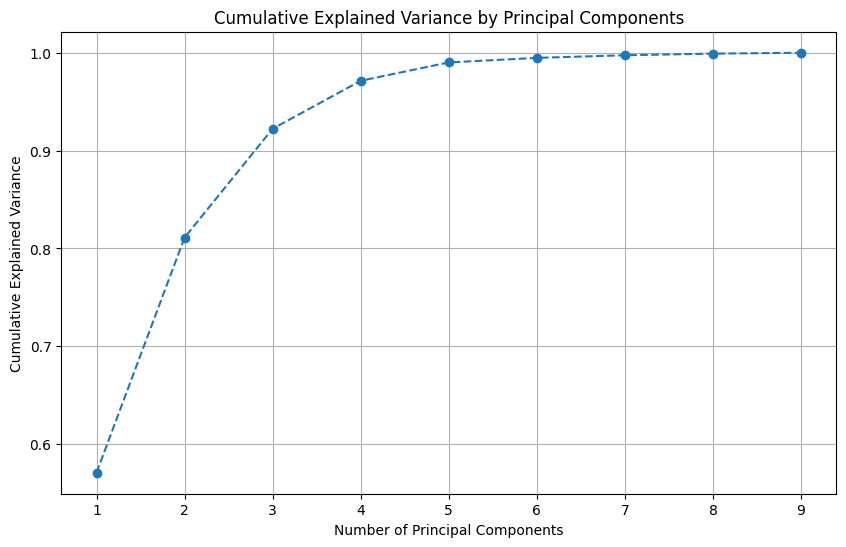

In [9]:
# Explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()

In [11]:
# Select number of components that explain 90% variance
n_components = np.argmax(cumulative_explained_variance >= 0.90) + 1
print(n_components)

3


In [13]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [14]:
# Get the loadings of the principal components
loadings = pca.components_

# Create a dataframe of the loadings
loadings_df = pd.DataFrame(loadings.T, index=features, columns=[f'PC{i+1}' for i in range(n_components)])

# Display the loadings
print(loadings_df)

                PC1     PC2     PC3
1_d_returns  0.1336  0.5298 -0.1259
2_d_returns  0.1713  0.5795 -0.0877
3_d_returns  0.1887  0.5306 -0.0349
29_d_returns 0.3918 -0.0487  0.4268
30_d_returns 0.3959 -0.0561  0.4210
31_d_returns 0.3967 -0.0631  0.3980
59_d_returns 0.3887 -0.1748 -0.3796
60_d_returns 0.3877 -0.1761 -0.3936
61_d_returns 0.3850 -0.1756 -0.3980


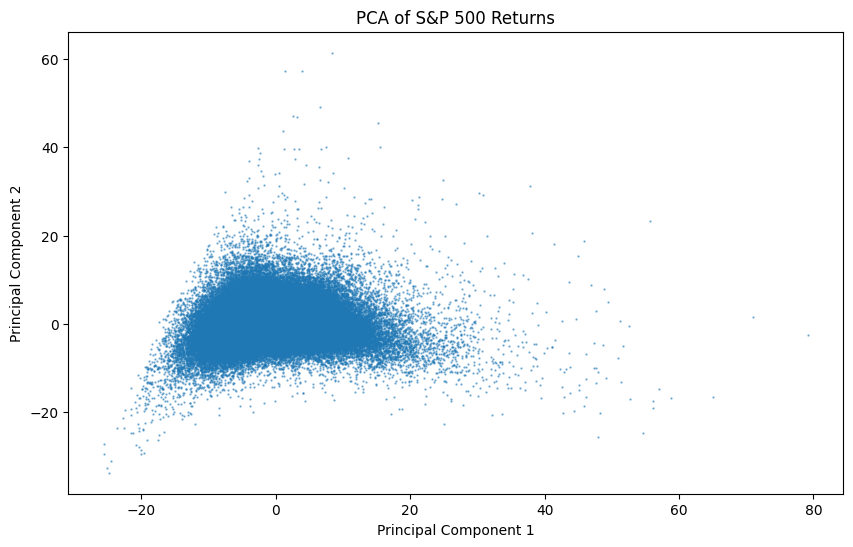

In [15]:
# Scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, s=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of S&P 500 Returns')
plt.show()


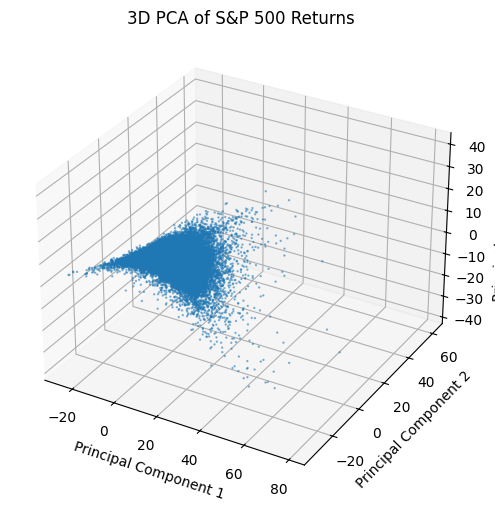

In [16]:
# 3D Scatter plot of the first three principal components
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=0.5, s=0.5)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of S&P 500 Returns')

plt.show()

### Combining PCA and KMeans

In [22]:
# Example: Clustering on PCA-reduced data
from sklearn.cluster import KMeans

# Initialize K-means algorithm
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit K-means to the PCA-reduced data
kmeans.fit(X_pca)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original dataframe
total_returns['Cluster'] = cluster_labels

# Analyze the characteristics of each cluster
cluster_stats = total_returns.groupby('Cluster').mean()

# Display cluster characteristics
print(cluster_stats)

C:\Users\cramk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



         F_1_d_returns  1_d_returns  2_d_returns  3_d_returns  4_d_returns  \
Cluster                                                                      
0               0.0009      -0.0129      -0.0230      -0.0300      -0.0343   
1               0.0003       0.0157       0.0282       0.0376       0.0438   
2               0.0045      -0.0506      -0.0832      -0.1046      -0.1174   
3               0.0006       0.0014       0.0024       0.0032       0.0041   
4              -0.0007       0.0580       0.1018       0.1306       0.1458   

         5_d_returns  6_d_returns  7_d_returns  8_d_returns  9_d_returns  \
Cluster                                                                    
0            -0.0358      -0.0346      -0.0336      -0.0327      -0.0319   
1             0.0467       0.0465       0.0463       0.0464       0.0465   
2            -0.1230      -0.1228      -0.1220      -0.1222      -0.1231   
3             0.0050       0.0060       0.0071       0.0081       0.0091 

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Extracting features
features = ['1_d_returns', '2_d_returns', '3_d_returns', '4_d_returns', '5_d_returns']
X = total_returns[features].values

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [25]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA(n_components=3)  # Choosing to reduce to 3 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Creating a DataFrame for PCA components
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])

# Adding the target variable back for reference
pca_df['F_1_d_returns'] = total_returns['F_1_d_returns'].values

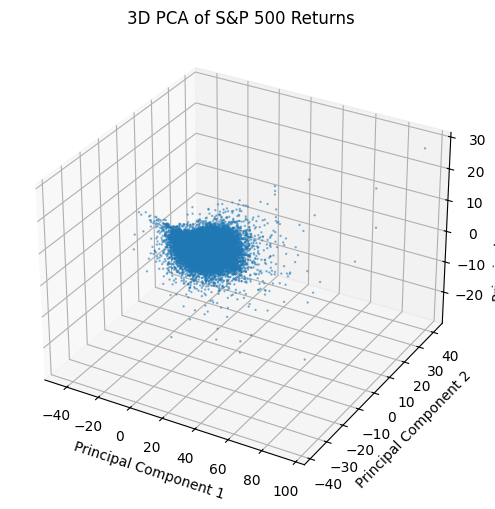

In [27]:
# 3D Scatter plot of the first three principal components
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=0.5, s=0.5)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of S&P 500 Returns')

plt.show()

In [28]:
from sklearn.cluster import KMeans

# Initialize K-means algorithm with a predefined number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit K-means to the PCA-reduced data
kmeans.fit(X_pca)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = cluster_labels


C:\Users\cramk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



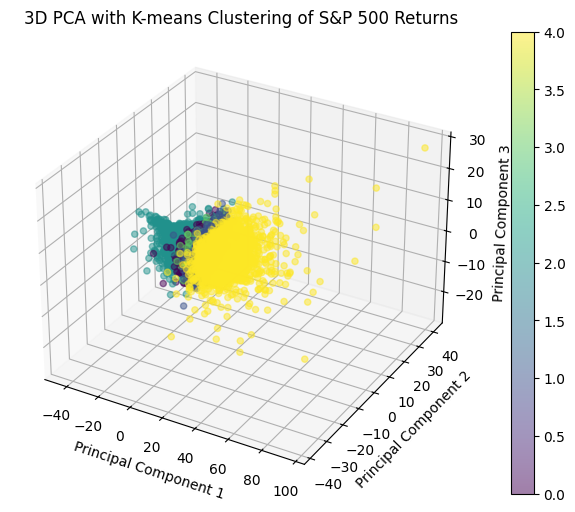

In [30]:
# 3D Scatter plot to visualize clusters
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    pca_df['PC1'], 
    pca_df['PC2'], 
    pca_df['PC3'], 
    c=pca_df['Cluster'],  # Color coding by cluster labels
    cmap='viridis', 
    alpha=0.5
)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA with K-means Clustering of S&P 500 Returns')

plt.colorbar(scatter, ax=ax)
plt.show()

In [32]:
# Analyzing the characteristics of each cluster
cluster_stats = pca_df.groupby('Cluster').mean()

# Displaying cluster characteristics
print(cluster_stats)

            PC1     PC2     PC3  F_1_d_returns
Cluster                                       
0       -1.6664 -0.0468 -0.0046         0.0009
1        1.8409  0.0548  0.0051         0.0003
2       -5.6171  0.1250 -0.0431         0.0045
3        0.0655 -0.0053  0.0054         0.0006
4        6.6001 -0.0651 -0.0857        -0.0007


In [ ]:
# Adding the original target variable for reference
#pca_df['F_1_d_returns'] = total_returns['F_1_d_returns']